# Job Placement Prediction Tool

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot, pyplot as plt
from sklearn import metrics, model_selection, svm
import ipywidgets as widgets

In [2]:
# Import data and convert to data frame
url = "job_placement_data.csv"
df = pd.read_csv(url)

### Sample dataset view and data types view

In [3]:
# Create a preview of the dataset
df.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status
0,67.00,91.00,58.00,55.0,58.80,Placed
1,79.33,78.33,77.48,86.5,66.28,Placed
2,65.00,68.00,64.00,75.0,57.80,Placed
3,56.00,52.00,52.00,66.0,59.43,Not Placed
4,85.80,73.60,73.30,96.8,55.50,Placed


In [4]:
# Check the different data types
df.dtypes

ssc_percentage         float64
hsc_percentage         float64
degree_percentage      float64
emp_test_percentage    float64
mba_percent            float64
status                  object
dtype: object

### Data Images

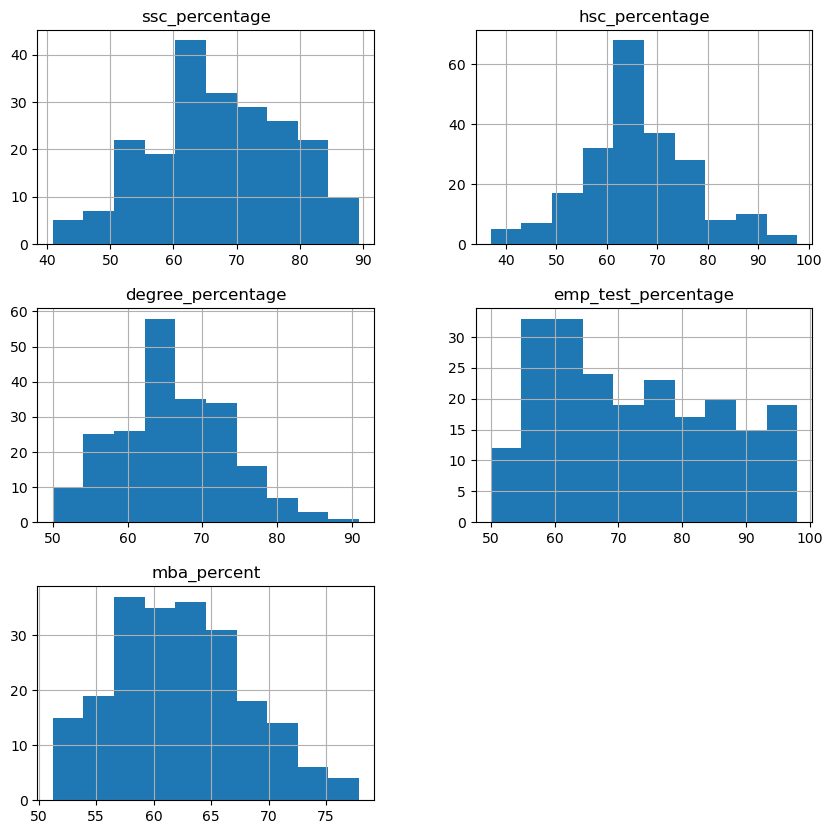

In [5]:
# Create a series of histograms to show the distribution of the test score percentages (x-axis)
# and the number of people (y-axis)
df.hist(figsize=(10,10))
pyplot.show()

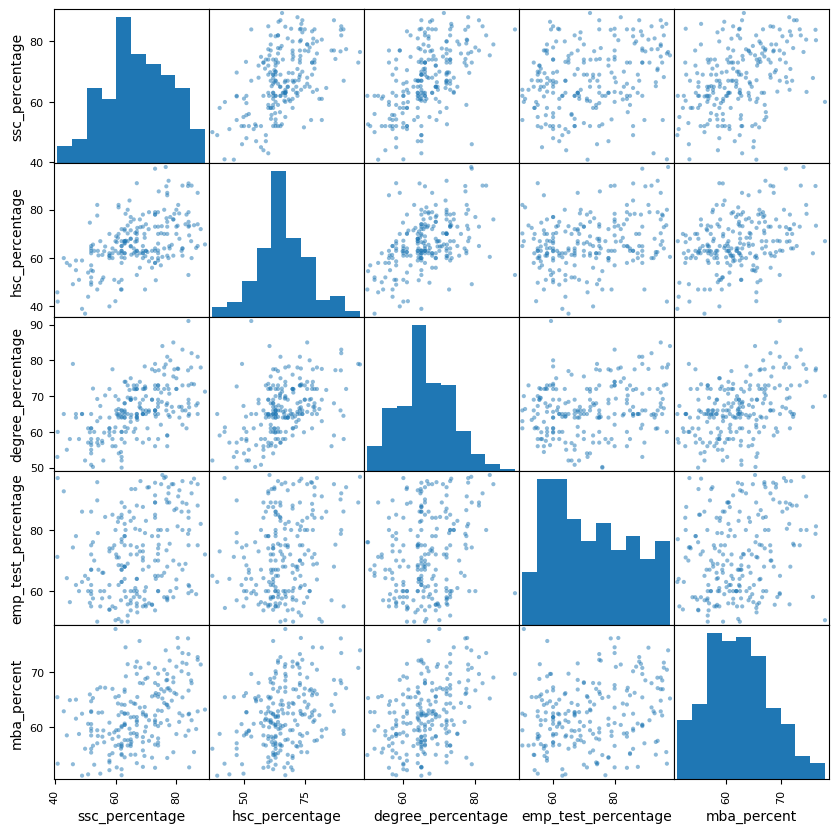

In [6]:
# Create a scatter plot matrix to see if their are any outliers in the dataset
pd.plotting.scatter_matrix(df,figsize=(10,10))
pyplot.show()

## Training and Testing

In [7]:
# Create subsets for training and testing in the ML model
X = df.values[:, 0:5]  # input values
y = df.values[:, 5]  # prediction values
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

### Repsentation of Placed and Non-Placed in the dataset

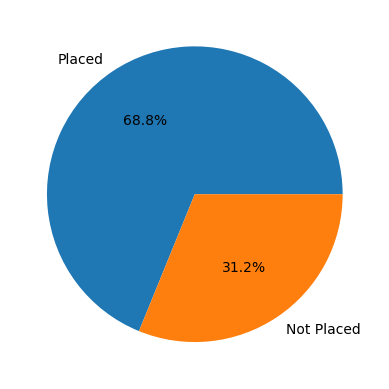

In [8]:
# Create pie chart to show the percentage of placed and non-placed individuals in the dataset
placed_count = 0
not_placed_count = 0
for i in y:
    if i == 'Placed':
        placed_count += 1
    else:
        not_placed_count += 1

pie_chart_values = np.array([placed_count, not_placed_count])
pie_chart_labels = ['Placed', 'Not Placed']
plt.pie(pie_chart_values, labels=pie_chart_labels, autopct='%1.1f%%')
plt.show()

### ML Algorithm

In [9]:
# Support Vector Machines (SVM) algorithm to perform the prediction of an individual being placed in a job or not
clf = svm.SVC()
clf.fit(X, y)  # train
y_pred_svm = clf.predict(x_test)  # predict

### Accuracy Metric

In [10]:
# Calcualte and display the metric for accuracy
print('Percentage of accuracy:', metrics.accuracy_score(y_test, y_pred_svm))

Percentage of accuracy: 0.8153846153846154


## User Interaction

In [11]:
# Use user input to predict if the individual would be placed or not placed in a job
user_input = input("\nEnter the test scores (Example: 82 76 70 91 62): ")
input_list = user_input.split(" ")
float_list = [[float(i) for i in input_list]]
result = clf.predict(float_list)

KeyboardInterrupt: Interrupted by user

In [ ]:
# Print the result of the prediction
print(result[0])